In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import boxcox
from sklearn.metrics import cohen_kappa_score
import lightgbm as ltb
from sklearn import svm

In [51]:
df = pd.read_csv("/kaggle/input/playground-series-s3e5/train.csv")
df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [53]:
df.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


In [54]:
df.isnull().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No NULL value in this dataset nice nice

<AxesSubplot:xlabel='quality', ylabel='count'>

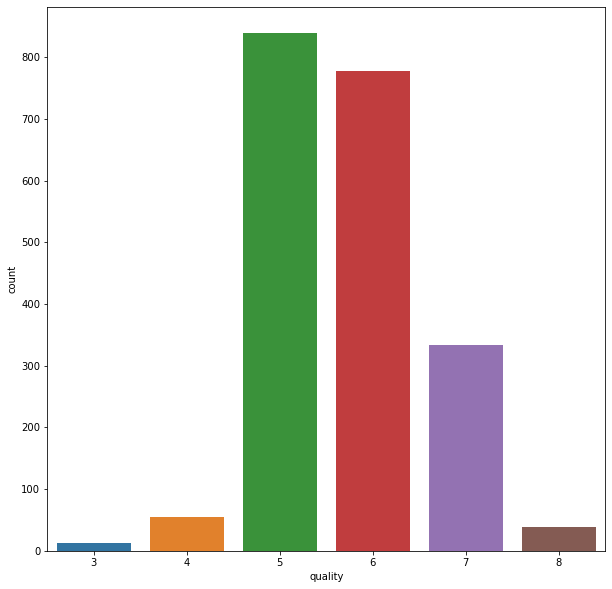

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = "quality")

5,6,7
score for quality is the majority.


In [56]:
df.columns

Index(['Id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [57]:
# sns.pairplot(df,hue = "quality", vars = ["fixed acidity", "density", "pH", "alcohol", "quality"])

In [58]:
# plt.figure(figsize = (8,8))
# columns_list = list(df.columns)
# columns_list.remove('Id')
# columns_list.remove('quality')
# for i in columns_list:
#     sns.displot(data = df, x = i,kde = True)

log tranformation, heterodicity, linearity due to the skewness


In [59]:
# plt.figure(figsize = (10,10))
# sns.heatmap(df.corr(), annot=True)

boxplot, outlier....

In [60]:
# plt.figure(figsize=(10,10))
# df.plot.hist(y = 'pH')
# plt.figure(figsize = (10,10))
# df.boxplot(column = 'pH')

I can think this problem as classification and regression. This time, I choose classification. 

In [61]:
def feature_engineering(df):
    quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}
    df.loc[:, "quality"] = df.quality.map(quality_mapping)
    
    df["total sulfur dioxide"] = df["total sulfur dioxide"].apply(lambda x : np.log(1 + x))
    df["free sulfur dioxide"] = df["free sulfur dioxide"].apply(lambda x : np.log(1 + x))
    df["citric acid"] = df["citric acid"].apply(lambda x : np.log(1 + x))
    #df["alcohol"] = df["alcohol"].apply(lambda x : np.log(1 + x))
    
    df["citric acid"] = df["citric acid"].apply(lambda x : np.log(1 + x))

    for i in ["total sulfur dioxide","free sulfur dioxide", "alcohol"]:
        bcx_target, lam = boxcox(df[i])
        df[i] = bcx_target
    
    df["total sulfur dioxide - free sulfur dioxide"] = df["total sulfur dioxide"] - df["free sulfur dioxide"]
    df["residual sugar * chlorides"] = df["residual sugar"] * df["chlorides"]
    df["fixed acidity + volatile acidity"] = df["fixed acidity"] + df["volatile acidity"]
    df["residual sugar * density"] = df["residual sugar"] * df["density"]
 
    pf = preprocessing.PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
    poly_feats = pf.fit_transform(df.drop(["quality", "Id"], axis=1))
    num_feats = poly_feats.shape[1]
    df_tranformed = pd.DataFrame(poly_feats, 
                            columns = [f"f_{i}" for i in range(1, num_feats + 1)])
    df = pd.concat([df_tranformed, df.quality],axis = 1)
    
    for i in df.columns:
        if i != "quality":
            df["{}_bined".format(i)] = pd.cut(df[i], bins = 5, labels = False)
    
    
    
    return df

In [62]:
# plt.figure(figsize = (8,8))
# columns_list = ["total sulfur dioxide", "free sulfur dioxide", "citric acid", "alcohol"]
# for i in columns_list:
#     sns.displot(data = df, x = i,kde = True)

In [63]:
def make_fold(df, fold):
    df["kfold"] = -1
    df.sample(frac=1).reset_index(drop = True)
    y = df.quality.values
    kf = model_selection.StratifiedKFold(n_splits = fold)
    for f, (t_,v_) in enumerate(kf.split(X = df, y = y)):
        df.loc[v_, 'kfold'] = f
    return df

In [64]:
df = feature_engineering(df)
df = make_fold(df, 5)

In [65]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_112_bined,f_113_bined,f_114_bined,f_115_bined,f_116_bined,f_117_bined,f_118_bined,f_119_bined,f_120_bined,kfold
0,8.0,0.50,0.284655,2.2,0.073,3.588262,3.379802,0.99572,3.33,0.77,...,0,1,0,0,0,0,0,0,0,0
1,9.3,0.30,0.437042,2.3,0.092,3.588262,4.162356,0.99854,3.32,0.67,...,0,1,0,0,1,0,0,0,0,0
2,7.1,0.51,0.029130,2.1,0.059,0.421819,1.830156,0.99660,3.52,0.73,...,0,1,0,0,1,0,0,0,0,0
3,8.1,0.87,0.181363,2.6,0.084,1.949501,4.117552,0.99730,3.20,0.53,...,0,1,0,1,2,1,0,0,0,0
4,8.5,0.36,0.232986,2.3,0.079,1.813012,3.583014,0.99444,3.20,1.36,...,0,1,0,0,2,0,0,0,0,0


In [66]:
# df = df.sample(frac=1).reset_index(drop = True)
# df_train = df.head(1800)
# df_test = df.tail(df.shape[0] - 1800)
# clf = tree.DecisionTreeClassifier(max_depth=3)
# clf.fit(df_train[cols], df_train.quality)
# train_predictions = clf.predict(df_train[cols])
# test_predictions = clf.predict(df_test[cols])
# train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
# test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
# print("train {}".format(train_accuracy), "test {}".format(test_accuracy))

In [67]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_112_bined,f_113_bined,f_114_bined,f_115_bined,f_116_bined,f_117_bined,f_118_bined,f_119_bined,f_120_bined,kfold
0,8.0,0.50,0.284655,2.2,0.073,3.588262,3.379802,0.99572,3.33,0.77,...,0,1,0,0,0,0,0,0,0,0
1,9.3,0.30,0.437042,2.3,0.092,3.588262,4.162356,0.99854,3.32,0.67,...,0,1,0,0,1,0,0,0,0,0
2,7.1,0.51,0.029130,2.1,0.059,0.421819,1.830156,0.99660,3.52,0.73,...,0,1,0,0,1,0,0,0,0,0
3,8.1,0.87,0.181363,2.6,0.084,1.949501,4.117552,0.99730,3.20,0.53,...,0,1,0,1,2,1,0,0,0,0
4,8.5,0.36,0.232986,2.3,0.079,1.813012,3.583014,0.99444,3.20,1.36,...,0,1,0,0,2,0,0,0,0,0


In [68]:
cols = list(df.columns)
cols.remove('quality')
cols.remove('kfold')

In [69]:
# fold_train = 0
# fold_test = 0
# fold = 5
# train_list = []
# test_list = []

# for i in tqdm(range(fold)):
#     df_train = df[df['kfold'] != i]
#     df_test = df[df['kfold'] == i]
    
#     model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
#     model.fit(df_train[cols], df_train.quality)
    
#     a = model.predict(df_train[cols])
#     p = model.predict(df_test[cols]) 
#     train_accuracy = cohen_kappa_score(df_train.quality, a, weights = "quadratic")
#     test_accuracy = cohen_kappa_score(df_test.quality, p, weights = "quadratic")
#     fold_train += train_accuracy
#     fold_test += test_accuracy

# train_list.append(fold_train / fold)
# test_list.append(fold_test / fold)

**Hyparameter search**

In [70]:
fold_train = 0
fold_test = 0
fold = 5
train_list = []
test_list = []

for i in tqdm(range(fold)):
    df_train = df[df['kfold'] != i]
    df_test = df[df['kfold'] == i]
    
    model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
    model.fit(df_train[cols], df_train.quality)
    
    
    p = model.predict(df_test[cols]) 
    
    test_accuracy = cohen_kappa_score(df_test.quality, p, weights = "quadratic")

    fold_test += test_accuracy

train_list.append(fold_train / fold)
test_list.append(fold_test / fold)

100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


In [79]:
test_list

[0.4180162915362075]

Light GBM Classification

randomForest 0.39, logisticrefgression 0.41

In [71]:
# fold_train = 0
# fold_test = 0
# fold = 5
# train_list = []
# test_list = []

# for i in tqdm(range(fold)):
#     df_train = df[df['kfold'] != i]
#     df_test = df[df['kfold'] == i]
#     model = ltb.LGBMClassifier()
#     model.fit(df_train[cols], df_train.quality)
#     print(model)
#     a = model.predict(df_train[cols])
#     p = model.predict(df_test[cols]) 
#     train_accuracy = cohen_kappa_score(df_train.quality, a, weights = "quadratic")
#     test_accuracy = cohen_kappa_score(df_test.quality, p, weights = "quadratic")
#     fold_train += train_accuracy
#     fold_test += test_accuracy

# train_list.append(fold_train / fold)
# test_list.append(fold_test / fold)

lgb 0.448

In [72]:
# fold_train = 0
# fold_test = 0
# fold = 5
# train_list = []
# test_list = []

# for i in tqdm(range(fold)):
#     df_train = df[df['kfold'] != i]
#     df_test = df[df['kfold'] == i]
#     model = svm.SVC()
#     model.fit(df_train[cols], df_train.quality)
#     print(model)
#     a = model.predict(df_train[cols])
#     p = model.predict(df_test[cols]) 
#     train_accuracy = cohen_kappa_score(df_train.quality, a, weights = "quadratic")
#     test_accuracy = cohen_kappa_score(df_test.quality, p, weights = "quadratic")
#     fold_train += train_accuracy
#     fold_test += test_accuracy

# train_list.append(fold_train / fold)
# test_list.append(fold_test / fold)

In [73]:
# train_list = []
# test_list = []
# fold = 5

# for depth in tqdm(range(1,25)):
#     fold_train = 0
#     fold_test = 0
#     for i in range(fold):
#         df_train = df[df['kfold'] != i]
#         df_test = df[df['kfold'] == i]
#         clf = tree.DecisionTreeClassifier(max_depth=depth)
#         clf.fit(df_train[cols], df_train.quality)
#         train_predictions = clf.predict(df_train[cols])
#         test_predictions = clf.predict(df_test[cols]) 
#         train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
#         test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
#         fold_train += train_accuracy
#         fold_test += test_accuracy
        
#     train_list.append(fold_train / fold)
#     test_list.append(fold_test / fold)

In [74]:
# plt.figure(figsize = (10,10))
# sns.countplot(data = sample_submission, x = 'quality')

In [75]:
# train_list = []
# test_list = []
# fold = 5

# for depth in tqdm(range(1,25)):
#     fold_train = 0
#     fold_test = 0
#     for i in tqdm(range(fold)):
#         df_train = df[df['kfold'] != i]
#         df_test = df[df['kfold'] == i]
#         rfc = RandomForestClassifier(max_depth = depth)
#         rfc.fit(df_train[cols], df_train.quality)
#         train_predictions = rfc.predict(df_train[cols])
#         test_predictions = rfc.predict(df_test[cols]) 
#         train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
#         test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
#         fold_train += train_accuracy
#         fold_test += test_accuracy

#     train_list.append(fold_train / fold)
#     test_list.append(fold_test / fold)

metrics
lgb classifier
light gbm's feature engineering and logistics models feature engineering


quadratic weighted kappa


https://www.kaggle.com/code/cpmpml/ultra-fast-qwk-calc-method/notebook

In [76]:
# plt.figure(figsize = (10,5))
# plt.plot(train_list, 'b--',label = "train") 
# plt.plot(test_list, 'r--', label = 'test')
# plt.xlabel("depth")
# plt.ylabel("accuracy")

Stratified cross-validation and ensemble


In [77]:
# xtrain, xvalid, ytrain, yvalid = train_test_split(train.text.values, y, 
#                                                   stratify=y, 
#                                                   random_state=42, 
#                                                   test_size=0.1, shuffle=True)

https://www.kaggle.com/code/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps/notebook
    metrics
    